In [30]:
import matplotlib.pyplot as plt
import numpy as np

In this notebook we attempt to come up with a reasonable analytical expression for annual mean insolation as a function of latitude $\varphi$ and obliquity (axial tilt) $\beta$. We begin by defining some constant scalars and arrays.

In [31]:
n_lats = 500
beta = np.pi * 23.5 / 180
S_0 = 1362

phi = np.linspace(-np.pi / 2, np.pi / 2, n_lats)
lat = 180 * phi / np.pi

Next, we calculate the fraction of the day that is illuminated at each latitude during the northern hemisphere summer solstice. Geometrical arguments suggest that this fraction is
$$\frac{1 + \tan\varphi\tan\beta}{2}$$
appropriate restricted to lie within $[0, 1]$.

(0.0, 24.0)

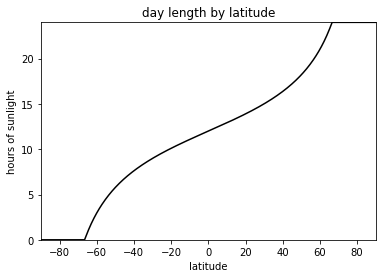

In [32]:
day_fracs = (1 + np.tan(phi) * np.tan(beta)) / 2
day_fracs = np.maximum(np.minimum(day_fracs, 1), 0)

%matplotlib inline
_, ax = plt.subplots()
ax.plot(lat, 24 * day_fracs, color='k')

ax.set_xlabel('latitude')
ax.set_ylabel('hours of sunlight')
ax.set_title('day length by latitude')

ax.set_xlim(-90, 90)
ax.set_ylim(0, 24)

Closer to the poles, the insolation is effectively weakened because the sun's rays do not arrive perpendicular to the surface, so the flux is spread out over a larger surface area. At the equinox (when the axial tilt plays no role), this decrease is proportional to $\cos\varphi$, but at the solstice we have to consider the axial tilt, and in this case the rate is $\cos(\varphi - \beta)$. (Of course, we need to bound the rate of weakening below by zero.) In the plot below we calculate this "diffusion factor" - the insolation received by an area at a given latitude, expressed as a fraction of the insolation the area would receive if the sunlight arrived perpendicularly to the surface.

(0.0, 1.0)

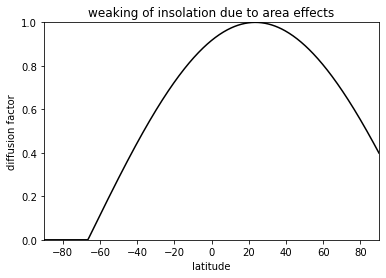

In [33]:
diffusion = np.cos(phi - beta)
diffusion = np.maximum(diffusion, 0)

%matplotlib inline
_, ax = plt.subplots()
ax.plot(lat, diffusion, color='k')

ax.set_xlabel('latitude')
ax.set_ylabel('diffusion factor')
ax.set_title('weaking of insolation due to area effects')

ax.set_xlim(-90, 90)
ax.set_ylim(0, 1)

Note that the above plot is reasonable for the summer solstice, at least in that the insolation is not weakened at all at $\varphi \approx 23.5^\circ$, which is the Tropic of Cancer where the insolation is perpendicular.

With these ingredients, we should be able to construct a rudimentary model of insolation. The solar constant $S_0 \approx 1362 \textrm{ W m}^{-2}$ allows us to calculate the energy reaching the Earth's "shadow" on the celestial sphere centered at the Sun. However, the effective value of the solar constant is $S_0 / 2$. This is because the area of the shadow is one quarter of the surface area of the Earth, but only half that surface area is facing the sun at any given time.

So, the insolation would go as $S_0 / 2$ times the diffusion factors immediately above, except that the latitude bands are (generally) not illuminated all day - that is why we calculated the day lengths earlier. (It is the simpler assumption that the day is always 12 hours everywhere that leads to the $S_0 / 4$ value we saw in class.) Multiplying by the day lengths completes the model.

Everything we have done so far is symmetric for the winter solstice, so we can represent the year as the average of the two solstice states. This is what we present below.

(-90.0, 90.0)

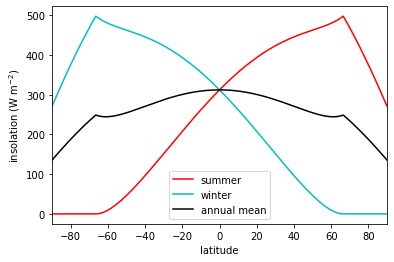

In [34]:
summer = (S_0 / 2) * day_fracs * diffusion
winter = np.flip(summer)
S = (summer + winter) / 2

%matplotlib inline
_, ax = plt.subplots()

ax.plot(lat, summer, color='r', label='summer')
ax.plot(lat, winter, color='c', label='winter')
ax.plot(lat, S, color='k', label='annual mean')

ax.set_xlabel('latitude')
ax.set_ylabel(r'insolation ($\mathrm{W}\ \mathrm{m}^{-2}$)')
ax.legend()

ax.set_xlim(-90, 90)

However, the annual mean calculated above is clearly too small across most latitude bands, and indeed, using this insolation in the radiation balance code produces equilibria that are far colder than the Earth we know.